In [ ]:
# import all the libraries
import pandas as pd #read data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #ubah jadi array

In [ ]:
from google.colab import drive

# mounting dataset dari gdrive
drive.mount('/content/gdrive', force_remount=True)

# lokasi dataset - ubah sesuai dengan lokasi anda mengupload folder datanya
root_path = 'gdrive/My Drive/PROJEK-AHLAN/FORCASTING/dataset/'

# opsional - tampilkan info lokasi dataset
print("Path root:", root_path)

Mounted at /content/gdrive
Path root: gdrive/My Drive/PROJEK-AHLAN/FORCASTING/dataset/


### Import dataset

In [ ]:
# read the dataset using pandas
data=pd.read_csv(root_path + 'student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 900x500 with 0 Axes>

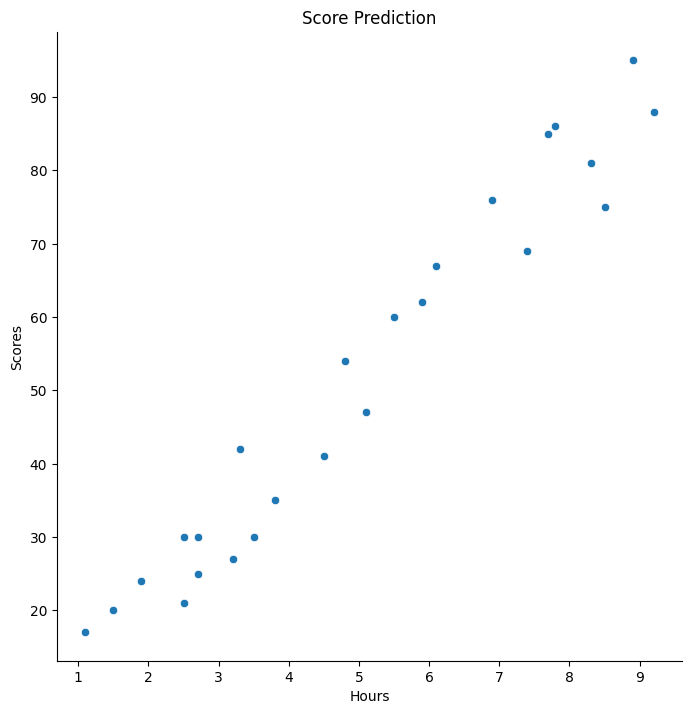

In [ ]:
plt.figure(figsize=(9,5))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

In [ ]:
df = data.copy()
print(df.shape)
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before
df = df.drop_duplicates()
print(df.shape)

(25, 2)
(25, 2)


In [ ]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

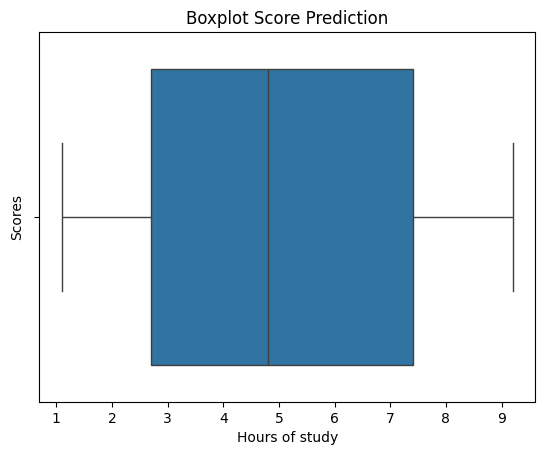

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.title("Boxplot Score Prediction")

# Menampilkan plot
plt.show()

In [ ]:
#split data
X= data['Hours']
#x=data[data(kolom1,k2,..,kn)]
X.head()


0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [ ]:
#scores
Y=data['Scores']
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [ ]:
#import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
#split data train dan test
#data train harus > data test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=42)

In [ ]:
!pip install scikit-learn

In [ ]:
#import linier regration dari scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
#ubah ke array
X_train=np.array(X_train)[:,np.newaxis]
X_test=np.array(X_test)[:,np.newaxis]


In [ ]:
Y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [ ]:
#mesin mempelajari data train
# Reshape X_train dari (18, 1, 1) menjadi (18, 1)
X_train_reshaped = X_train.reshape(18, 1)
#harus 2 dimensi
# Memastikan Y_train dalam bentuk yang sesuai
Y_train_reshaped = Y_train

# Latih model regresi linear dengan data yang sudah direshape
lr_model = LinearRegression()
lr_model.fit(X_train_reshaped, Y_train_reshaped)


LinearRegression()

In [ ]:
# Misalkan X_test memiliki dimensi (7, 1, 1)
#harus dalam 2 dimensi
X_test_reshaped = X_test.reshape(7, 1)


In [ ]:
#evaluasi model ke x test
y_pred=lr_model.predict(X_test_reshaped)

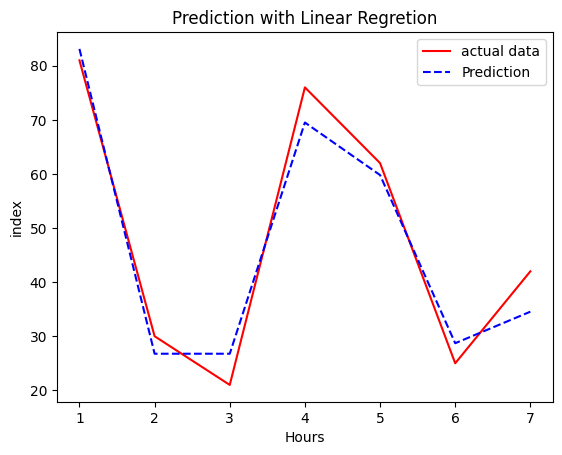

In [ ]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c=[i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

# New section

In [ ]:
#import metriks dari scikit learn
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
rsq=r2_score(Y_test,y_pred)

In [ ]:
print('r Squared linear regression', rsq)

r Squared linear regression 0.9553509219739938


In [ ]:
#intercept and koefisien
print('intercept of Linear regression model:',lr_model.intercept_)
print('koefisien of the line Linear regression :',lr_model.coef_)
#y=mx+c
#m=gradien
#x=hours
#c intercept



intercept of Linear regression model: 2.4803670915057623
koefisien of the line Linear regression : [9.71409219]


kesimpulan = Y= 9.71409219 X + 2.4803670915057623

DECISION TREE


In [ ]:
#bandingkan dengan decision tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model= DecisionTreeRegressor()
dt_model.fit(X_train_reshaped,Y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt=dt_model.predict(X_test_reshaped)

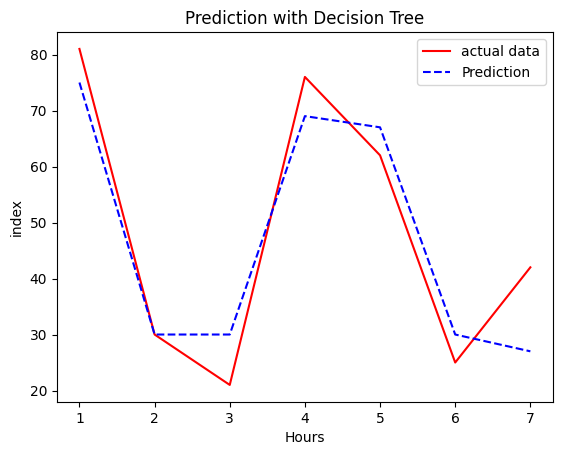

In [ ]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c=[i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
rsq_dt=r2_score(Y_test,y_pred_dt)

In [ ]:
print('r square Desicion tree result:',rsq_dt)

r square Desicion tree result: 0.8803859268443893


jika model Desicion tree dibandingkan dengan model linier regression direkomendasikan memakai model linear regression karena secara angka lebih tinggi dibanding decision tree

R Score Linear regresion = 95
 R score decision tree = 88
